In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_fwf("2002FemPreg.dat", names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb","birthwgt_oz", 
                                             "prglength", "outcome", "birthord", "agepreg", "finalwgt"],
                                       colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (57, 59),
                                                 (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
data.head(10)

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,81.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,71.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,9.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,7.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,6.0,39,1,3.0,18.0,12999.542264
5,6,1.0,1.0,8.0,8.0,38,1,1.0,27.0,8874.440799
6,6,1.0,2.0,9.0,9.0,40,1,2.0,28.0,8874.440799
7,6,1.0,2.0,8.0,8.0,42,1,3.0,30.0,8874.440799
8,7,1.0,1.0,7.0,7.0,39,1,1.0,28.0,6911.879921
9,7,1.0,2.0,6.0,61.0,35,1,2.0,32.0,6911.879921


In [13]:
#As mean describes the central tendency of a sample, Variance is intended to describe(quantify) the spread(it describes
#how much variability there is). 
#The square root of variance is Standard Deviation(which is also used as a measure of spread).
#Reusing the data from the previous notebook, compute the standard deviation of gestation time for first babies and others
live_births = data[data['outcome'] == 1]

first_babies = live_births[live_births['birthord'] == 1]
others = live_births[live_births['birthord'] != 1]

#std(): Normalized by N-1 by default. You might have seen a formula for variance with n-1 in the denominator, rather than n.
#This statistic is called the "sample variance", and it is used to estimate the variance in a population using a sample.
print('Standard deviation of gestation time for first babies: ', first_babies['prglength'].std())
print('Standard deviation of gestation time for non first babies: ', others['prglength'].std())


print('\nMean pregnancy weeks for first babies: ', first_babies['prglength'].mean())
print('Mean pregnancy weeks for non first babies: ', others['prglength'].mean())

Standard deviation of gestation time for first babies:  2.7919014146686947
Standard deviation of gestation time for non first babies:  2.615852350439255

Mean pregnancy weeks for first babies:  38.60095173351461
Mean pregnancy weeks for non first babies:  38.52291446673706


In [20]:
#How big is the difference in the means compared to these standard deviations?
#The functon below computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:
#https://github.com/AllenDowney/ThinkStats2/blob/master/solutions/chap02soln.ipynb

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    #Variance is intended to describe the spread
    variance1 = group1.var()
    variance2 = group2.var()
    number_of_observations_1, number_of_observations_1 = len(group1), len(group2)

    pooled_var = (number_of_observations_1 * variance1 + number_of_observations_1 * variance2) / (number_of_observations_1 + number_of_observations_1)
    d = diff / np.sqrt(pooled_var)
    
    return d


CohenEffectSize(first_babies.prglength, others.prglength)

0.028845968264912227

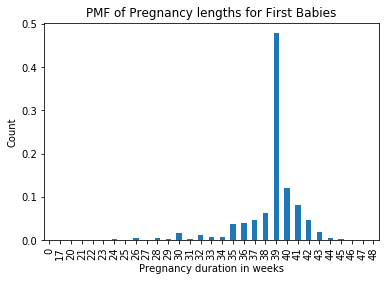

In [43]:
#PMF stands for Probability Mass Function which is a normalized histogram
#A probability mass function (PMF) is a function over the sample space of a discrete random variable X which gives the 
#probability that X is equal to a certain value
#The process of dividing a frequency(value_counts()) by a sample size(len(...)) to get a probability is called normalization
pmf = first_babies.prglength.value_counts().sort_index() / len(first_babies.prglength)
pmf.plot(kind='bar')
plt.xlabel('Pregnancy duration in weeks')
plt.ylabel('Count')
plt.title('PMF of Pregnancy lengths for First Babies')
plt.show()

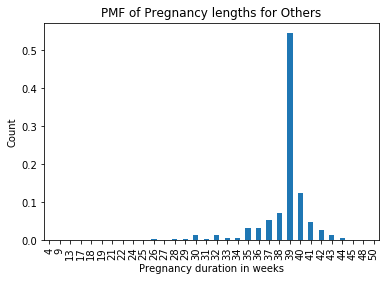

In [44]:
pmf = others.prglength.value_counts().sort_index() / len(others.prglength)
pmf.plot(kind='bar')
plt.xlabel('Pregnancy duration in weeks')
plt.ylabel('Count')
plt.title('PMF of Pregnancy lengths for Others')
plt.show()

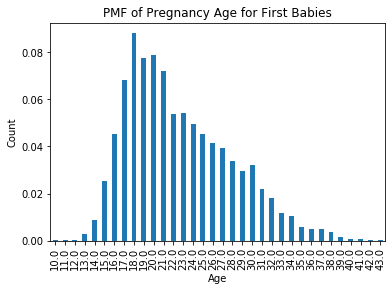

In [45]:
pmf = first_babies.agepreg.value_counts().sort_index() / len(others.agepreg)
pmf.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('PMF of Pregnancy Age for First Babies')
plt.show()

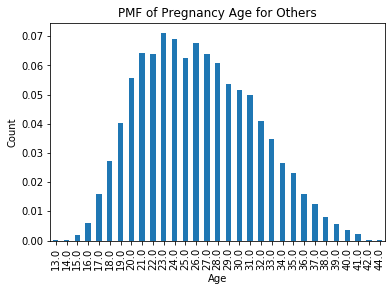

In [46]:
pmf = others.agepreg.value_counts().sort_index() / len(others.agepreg)
pmf.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('PMF of Pregnancy Age for Others')
plt.show()

In [55]:
#Pregnancy lengths for live births
live_births.loc[:,'prglength'].value_counts().sort_values(ascending=False)

#Certainly, values below 20 weeks are errors, and values higher than 30 weeks are probably legitimate. Values in between are
#hard to interpret. Since it's hard to know for sure, one option is to trim the data by discarding some fraction of the 
#highest and lowest values(#https://en.wikipedia.org/wiki/Truncated_mean)

39    4693
40    1116
38     607
41     587
37     455
42     328
36     321
35     311
43     148
30     138
32     115
34      60
33      49
44      46
26      35
28      32
31      27
29      21
24      13
45      10
22       7
48       7
27       3
25       3
17       2
50       2
21       2
23       1
4        1
46       1
13       1
20       1
9        1
19       1
18       1
47       1
0        1
Name: prglength, dtype: int64